# Inicialización de R

In [1]:
R.version.string

[1] "R version 4.0.4 (2021-02-15)"

## Instalación de paquetes

In [2]:
#install.packages("rgl", repos = "http://cran.rstudio.com/")
#install.packages("ConsRank", repos = "http://cran.rstudio.com/")
#install.packages("ggbiplot")
#install.packages("factoextra")
#install.packages("ggpubr")
#install.packages("MVA")
#install.packages("dendextend")

# Conjunto de Datos: Heptatlón

El conjunto de datos pertenece a los resultados de los 25 competidores en las siete disciplinas del Heptatlón de los Juegos Olímpicos de 1988 celebrados en Seúl. 

Librerias necesarias para uso y manipulación del conjunto de datos.

In [3]:
library("HSAUR2")
library("tools")

library("MVA")
X <- heptathlon

Loading required package: tools



Observamos resultados de algunos paises. 

In [4]:
X

,hurdles,highjump,shot,run200m,longjump,javelin,run800m,score
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Joyner-Kersee (USA),12.69,1.86,15.80,22.56,7.27,45.66,128.51,7291
John (GDR),12.85,1.80,16.23,23.65,6.71,42.56,126.12,6897
Behmer (GDR),13.20,1.83,14.20,23.10,6.68,44.54,124.20,6858
Sablovskaite (URS),13.61,1.80,15.23,23.92,6.25,42.78,132.24,6540
Choubenkova (URS),13.51,1.74,14.76,23.93,6.32,47.46,127.90,6540
Schulz (GDR),13.75,1.83,13.50,24.65,6.33,42.82,125.79,6411
Fleming (AUS),13.38,1.80,12.88,23.59,6.37,40.28,132.54,6351
Greiner (USA),13.55,1.80,14.13,24.48,6.47,38.00,133.65,6297
Lajbnerova (CZE),13.63,1.83,14.28,24.86,6.11,42.20,136.05,6252


## Preprocesamiento


Puntuamos las ocho variables en la misma dirección para que los valores "grandes" sean indicativos de un rendimiento "mejor".

In [5]:
X$hurdles <- with(X, max(hurdles)-hurdles)
X$run200m <- with(X, max(run200m)-run200m)
X$run800m <- with(X, max(run800m)-run800m)

Omitimos columna correspondiente a la variable de Puntuación antes de hacer un análisis ya que se calcula a partir de las otras variables.

In [6]:
score_index <- which(colnames(X) == "score")
X <- X[, -score_index]

Escalamos datos para un correcto uso de $k$-medias y Agrupamiento Jerárquico.

In [7]:
X <- as.data.frame(scale(X))

## Valores Numéricos

### Matriz de Covarianza

Algunas observaciones por variables

* Salto de Longitud (__longjump__): Tiene un índice  de correlación superior a $0.7$  con las otras variables, salvo con Jabalina.

* Jabalina (__javelin__): Tiene baja un índice de correlación con las otras variables. 

La pareja de variables con mayor correlación es 

* Obstáculos (__hurdles__) y Salto de longitud (__longjump__): $\rho = 0.91$

Las parejas con correlación mayor a $0.8$ son

* 200 Metros Planos (__run200m__) y Salto de Longitud (__longjump__): $\rho = 0.82$
* Obstáculos (__hurdles__) y Salto de Altura (__highjump__): $\rho = 0.81$

In [8]:
round(cor(X[, -score_index]), 2)

,hurdles,highjump,shot,run200m,longjump,javelin,run800m
hurdles,1.00,0.81,0.65,0.77,0.91,0.01,0.78
highjump,0.81,1.00,0.44,0.49,0.78,0.00,0.59
shot,0.65,0.44,1.00,0.68,0.74,0.27,0.42
run200m,0.77,0.49,0.68,1.00,0.82,0.33,0.62
longjump,0.91,0.78,0.74,0.82,1.00,0.07,0.70
javelin,0.01,0.00,0.27,0.33,0.07,1.00,-0.02
run800m,0.78,0.59,0.42,0.62,0.70,-0.02,1.00


## Visualizacion de datos

Visualizamos datos en búsqueda de presencia de agrupamientos de puntos.

### Visualizacion por parejas de variables
Podemos notar que

* Cada gráfica presenta un punto aislado en la esquina inferior izquierda. 
* En algunas de las gráficas (Por ejemplo __longjump__ vs __hurdless__) se puede apreciar una acumulación de puntos ("Mancha negra")

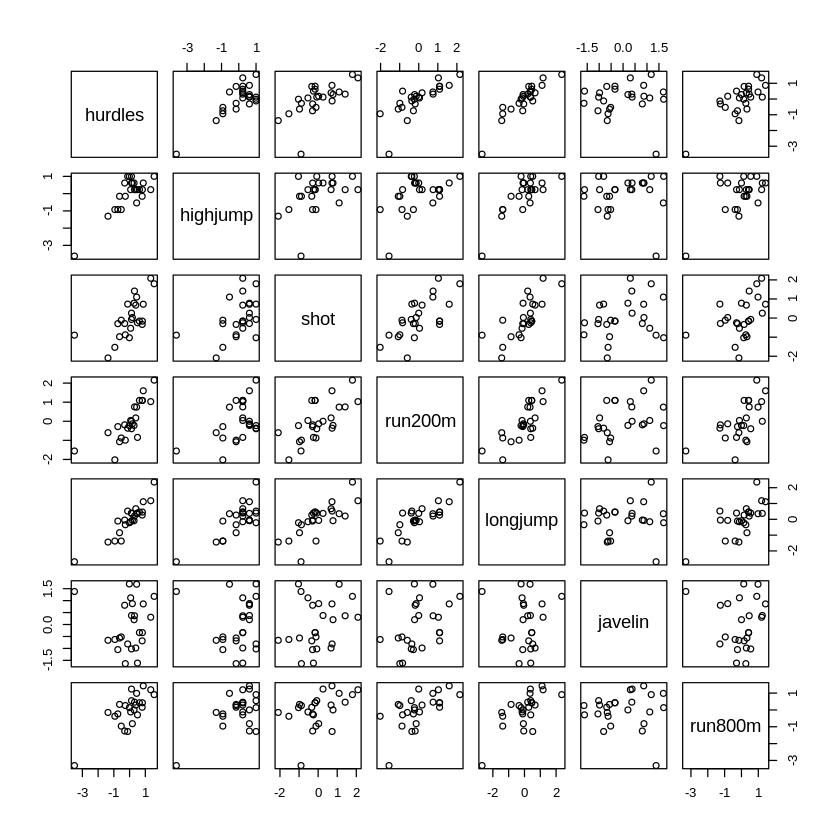

In [9]:
plot(X)

### Visualización en componentes principales

Las primeras dos componentes explican más del 80% de la varianza. Podemos notar que

* Un punto en particular se aleja de los demás.
* Se aprecia la acumulación de varios puntos en dos zonas diferentes.

Observamos varianza explicada sin tomar en cuenta la variable de puntuación. Las primeras dos componentes explican poco más del 80% de la varianza.

In [10]:
pca = prcomp(X, center = TRUE, scale = TRUE)
summary(pca)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6    PC7
Standard deviation     2.1119 1.0928 0.72181 0.67614 0.49524 0.27010 0.2214
Proportion of Variance 0.6372 0.1706 0.07443 0.06531 0.03504 0.01042 0.0070
Cumulative Proportion  0.6372 0.8078 0.88223 0.94754 0.98258 0.99300 1.0000

Proyectamos observaciones en el plano de las componentes principales. Notemos que 

* Un punto en particular se aleja de los demás (Punto rojo).
* Se aprecia la acumulación de varios puntos en dos zonas diferentes (Puntos azules).

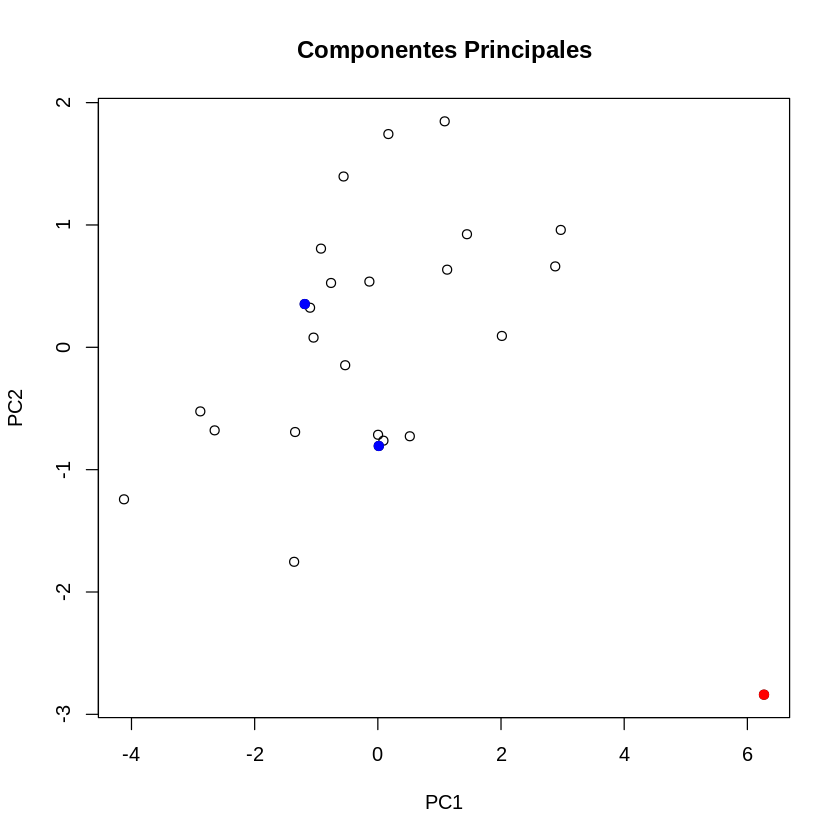

In [11]:
xlim <- range(pca$x[,1])
ylim <- range(pca$x[,2])
X_2d <- pca$x[,1:2]
# Proyeccion al plano de las componentes principales
plot(X_2d, xlim = xlim, ylim = ylim, main="Componentes Principales")
# Peor puntuacion en Rojo
points(
    X_2d[c("Launa (PNG)"),1], 
    X_2d[c("Launa (PNG)"),2], 
    col="red",
    pch=19
)
# Acumulacion de puntos
points(
    X_2d[c("Scheider (SWI)"),1], 
    X_2d[c("Scheider (SWI)"),2], 
    col="blue",
    pch=19
)
points(
    X_2d[c("Dimitrova (BUL)"),1], 
    X_2d[c("Dimitrova (BUL)"),2], 
    col="blue",
    pch=19
)

Observamos los nombres asociados a cada punto

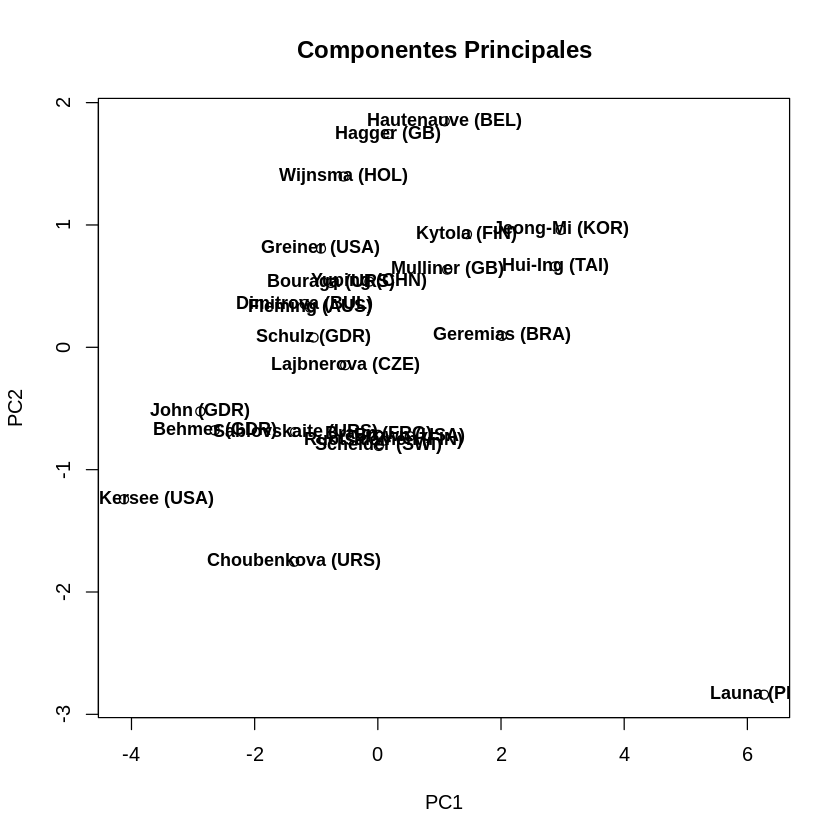

In [12]:
plot(X_2d, xlim = xlim, ylim = ylim, main="Componentes Principales")
text(X_2d, labels=rownames(X), cex=0.9, font=2)

# Clustering

## $k$-Medias

In [13]:
library("factoextra")
library("ggpubr")

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



Determinamos la cantidad óptima de centroides a utilizar a partir del __Método del Codo__, este método busca seleccionar la cantidad ideal de grupos a partir de la optimización de la WCSS (Within Clusters Summed Squares). Para ello, aplicaremos la función `kmeans` al conjunto de datos, variando en cada caso el valor de $k$, y acumulando los valores de WCSS obtenidos:

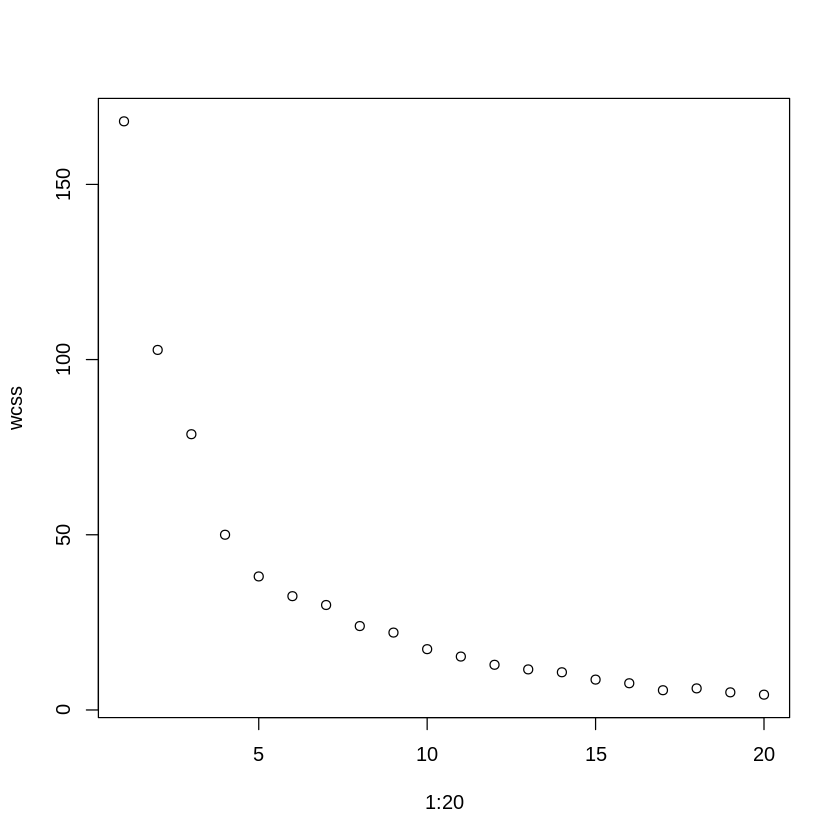

In [14]:
set.seed(1234)
wcss <- vector()
for(i in 1:20){
  wcss[i] <- sum(kmeans(X, i)$withinss)
}
plot(x=1:20, y=wcss)

A partir de $k=5$ podemos notar que ya no se producen variaciones importantes en WCSS, por lo que podemos elegir $k=5$ como número de clusters

### $k = 5$
Podemos notar que

* El cluster Rojo contiene sólamente una observación correspondiente al punto más alejado de los demás correspondiente al participante con menor puntuación.

* El cluster Amarillo tiene como centroide uno de los puntos azules mencionados en la sección de visualización.

* El cluster Azul tiene su centroide cerca de uno de los puntos azules mencionados en la sección de visualización.

* El cluster verde contiene a los participantes con mejores puntuaciones.


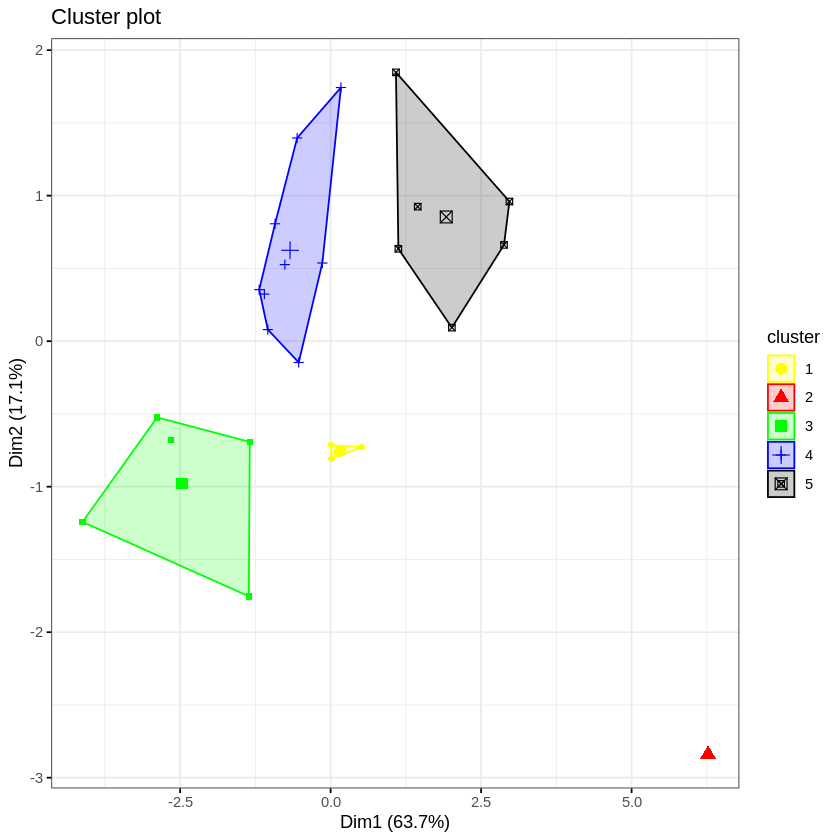

In [15]:
set.seed(321)
km_result <- kmeans(X, 5, nstart = 50)

fviz_cluster(km_result, data = X,
             palette = c("yellow", "red", "green", "blue", "black"), 
             geom = "point",
             ellipse.type = "convex", 
             ggtheme = theme_bw()
)

### Caso especial $k = 2$ y $k = 3$
Podemos notar que para $k = 2$

* La media del primer cluster (Verde) está entre los dos cúmulos descritos anteriormente en la sección de visualización. 

* El segundo clúster (Rojo) contiene el punto más alejado. Notemos que este cluster contiene puntos muy cerca entre sí (Parte superior) y por otro lado contiene el punto más alejado de las demás observaciones, el cual se encuentra lejos de las otras observaciones del mismo cluster.

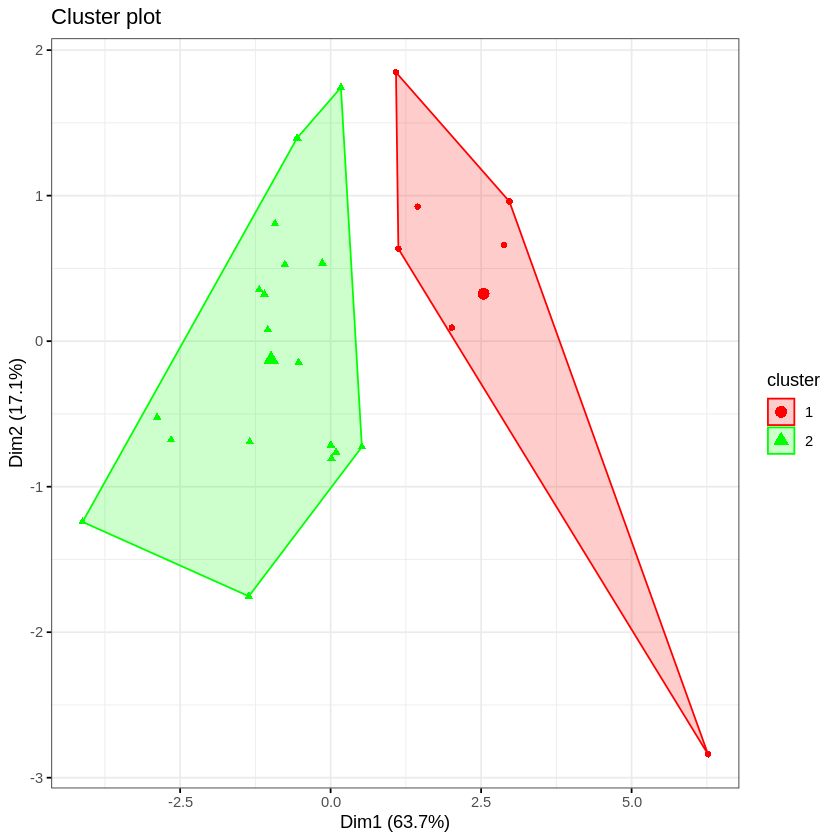

In [16]:
set.seed(321)
km_result <- kmeans(scale(X), 2, nstart = 50)

fviz_cluster(km_result, data = X,
             palette = c("red", "green"), 
             geom = "point",
             ellipse.type = "convex", 
             ggtheme = theme_bw()
)

Por otro lado, para $k = 3$ notamos que los clusters quedan practicamente igual, salvo que ahora se le asigna un cluster a un sólo dato.

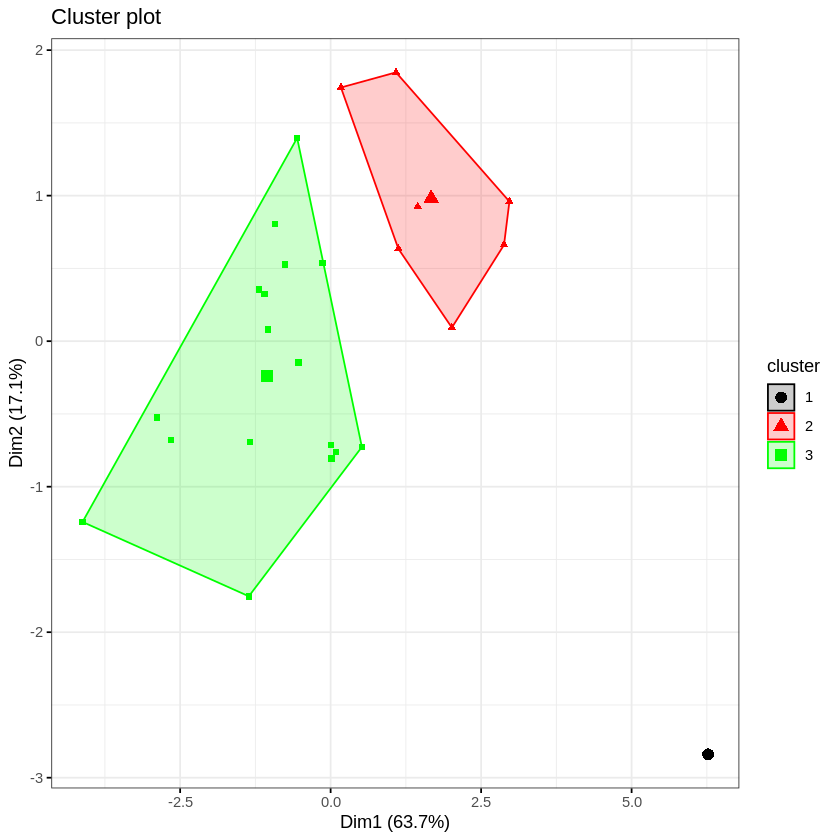

In [22]:
set.seed(321)
km_result <- kmeans(scale(X), 3, nstart = 50)

fviz_cluster(km_result, data = X,
             palette = c("black", "red", "green"), 
             geom = "point",
             ellipse.type = "convex", 
             ggtheme = theme_bw()
)

## Agrupamiento Jerárquico

Elegimos medida de distancias y calculamos por parejas. En este caso usamos la Distancia Euclidiana

In [17]:
distances <- dist(X, method="euclidean")

Dado que se tiene un dato atípico usamos el método del promedio 

In [18]:
h_average <-hclust(distances, method="average")

### $k = 5$

Elegimos el mismo numero de clusters que $k$-medias. En general se obtiene el mismo resultado salvo unos cuantos puntos que cambian de cluster.

* El cluster Verde aquí corresponde al cluster Verde de $k$-medias, exepto por un punto.

* El cluster Azul Marino aquí corresponde al cluster Negro de $k$-medias, exepto por un punto.

* El cluster Azul Cielo aquí corresponde al cluster Amarillo de $k$-medias, exepto por un punto.

* El cluster Morado aquí corresponde al cluster Azul Marino de $k$-medias. En su mayoria coninciden.

* El cluster Verde contiene a los participantes con mejores puntuaciones al igual que $k$-medias.

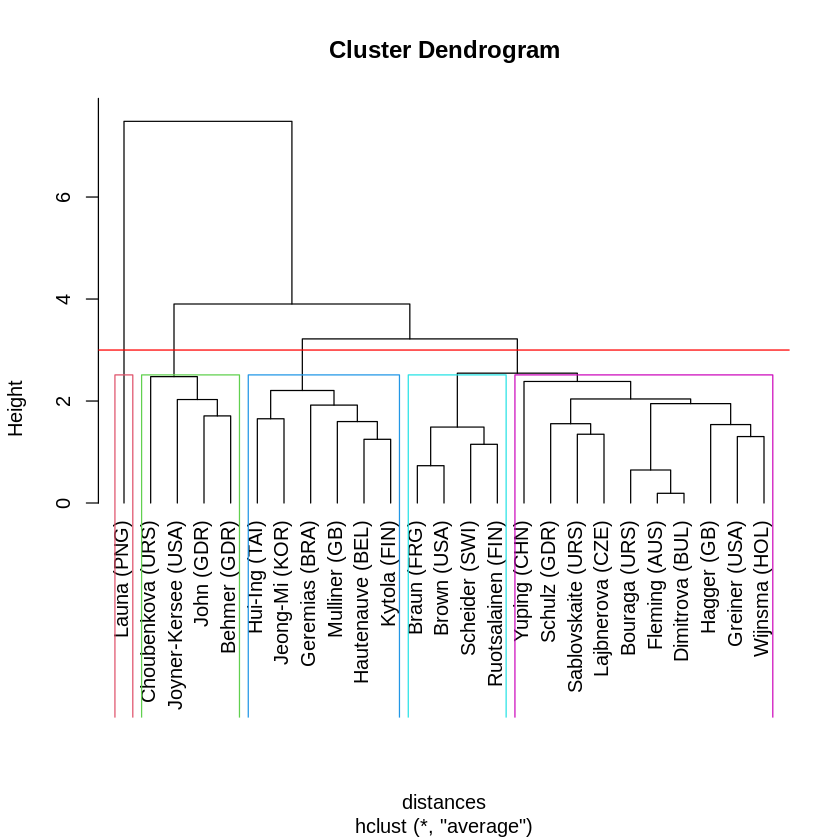

In [19]:
plot(h_average, hang=-1)
rect.hclust(h_average , k = 5, border = 2:6)
abline(h = 3, col = 'red')

### Caso $k = 2$
Notemos que para el caso $k = 2$ el algoritmo aisla en un sólo cluster el punto más alejado.

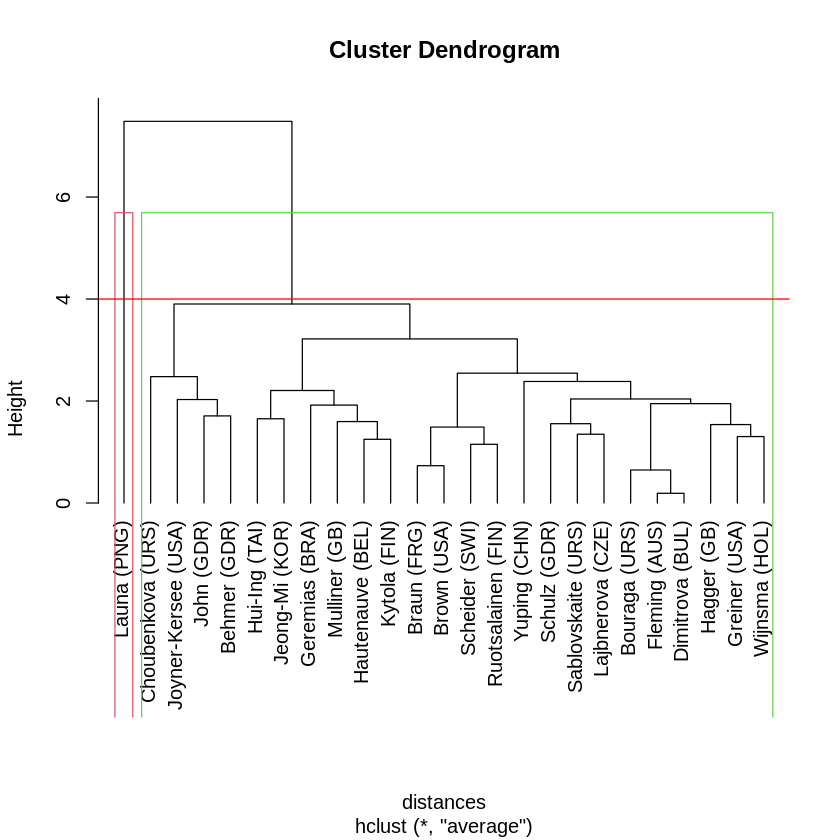

In [20]:
plot(h_average, hang=-1)
rect.hclust(h_average , k = 2, border = 2:6)
abline(h = 4, col = 'red')

# Concluisiones

* Podemos observar la presencia de un dato atípico. En la mayoría de los casos, los algoritmos aislan a este dato en un cluster. Este dato pertenece a Launa (PNG), la cual obtuvo los valores más pequeños en cada variable (A exepción de la variable de Jabalina). El único caso en el que no sucede esto es con $k$-medias y esto se debe posiblemente a la sensibilidad a datos atípicos del algoritmo, además sirve de ejemplo para el ejercicio 1 de las preguntas cortas de la tarea.

* Haciendo uso del Méétodo del Codo en $k$-medias se llega a la conclusion de usar $k=5$. Este $k$ se usa en ambos métodos obteniendo resultados similares.
